In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('Data/Real_Data/Real_Combine.csv')

In [3]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


# Data Analysis and Cleaning

In [4]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df=df.dropna()

In [6]:
X = df.iloc[:,:-1]   #Independant Features
Y = df.iloc[:,-1]    #Dependant Features

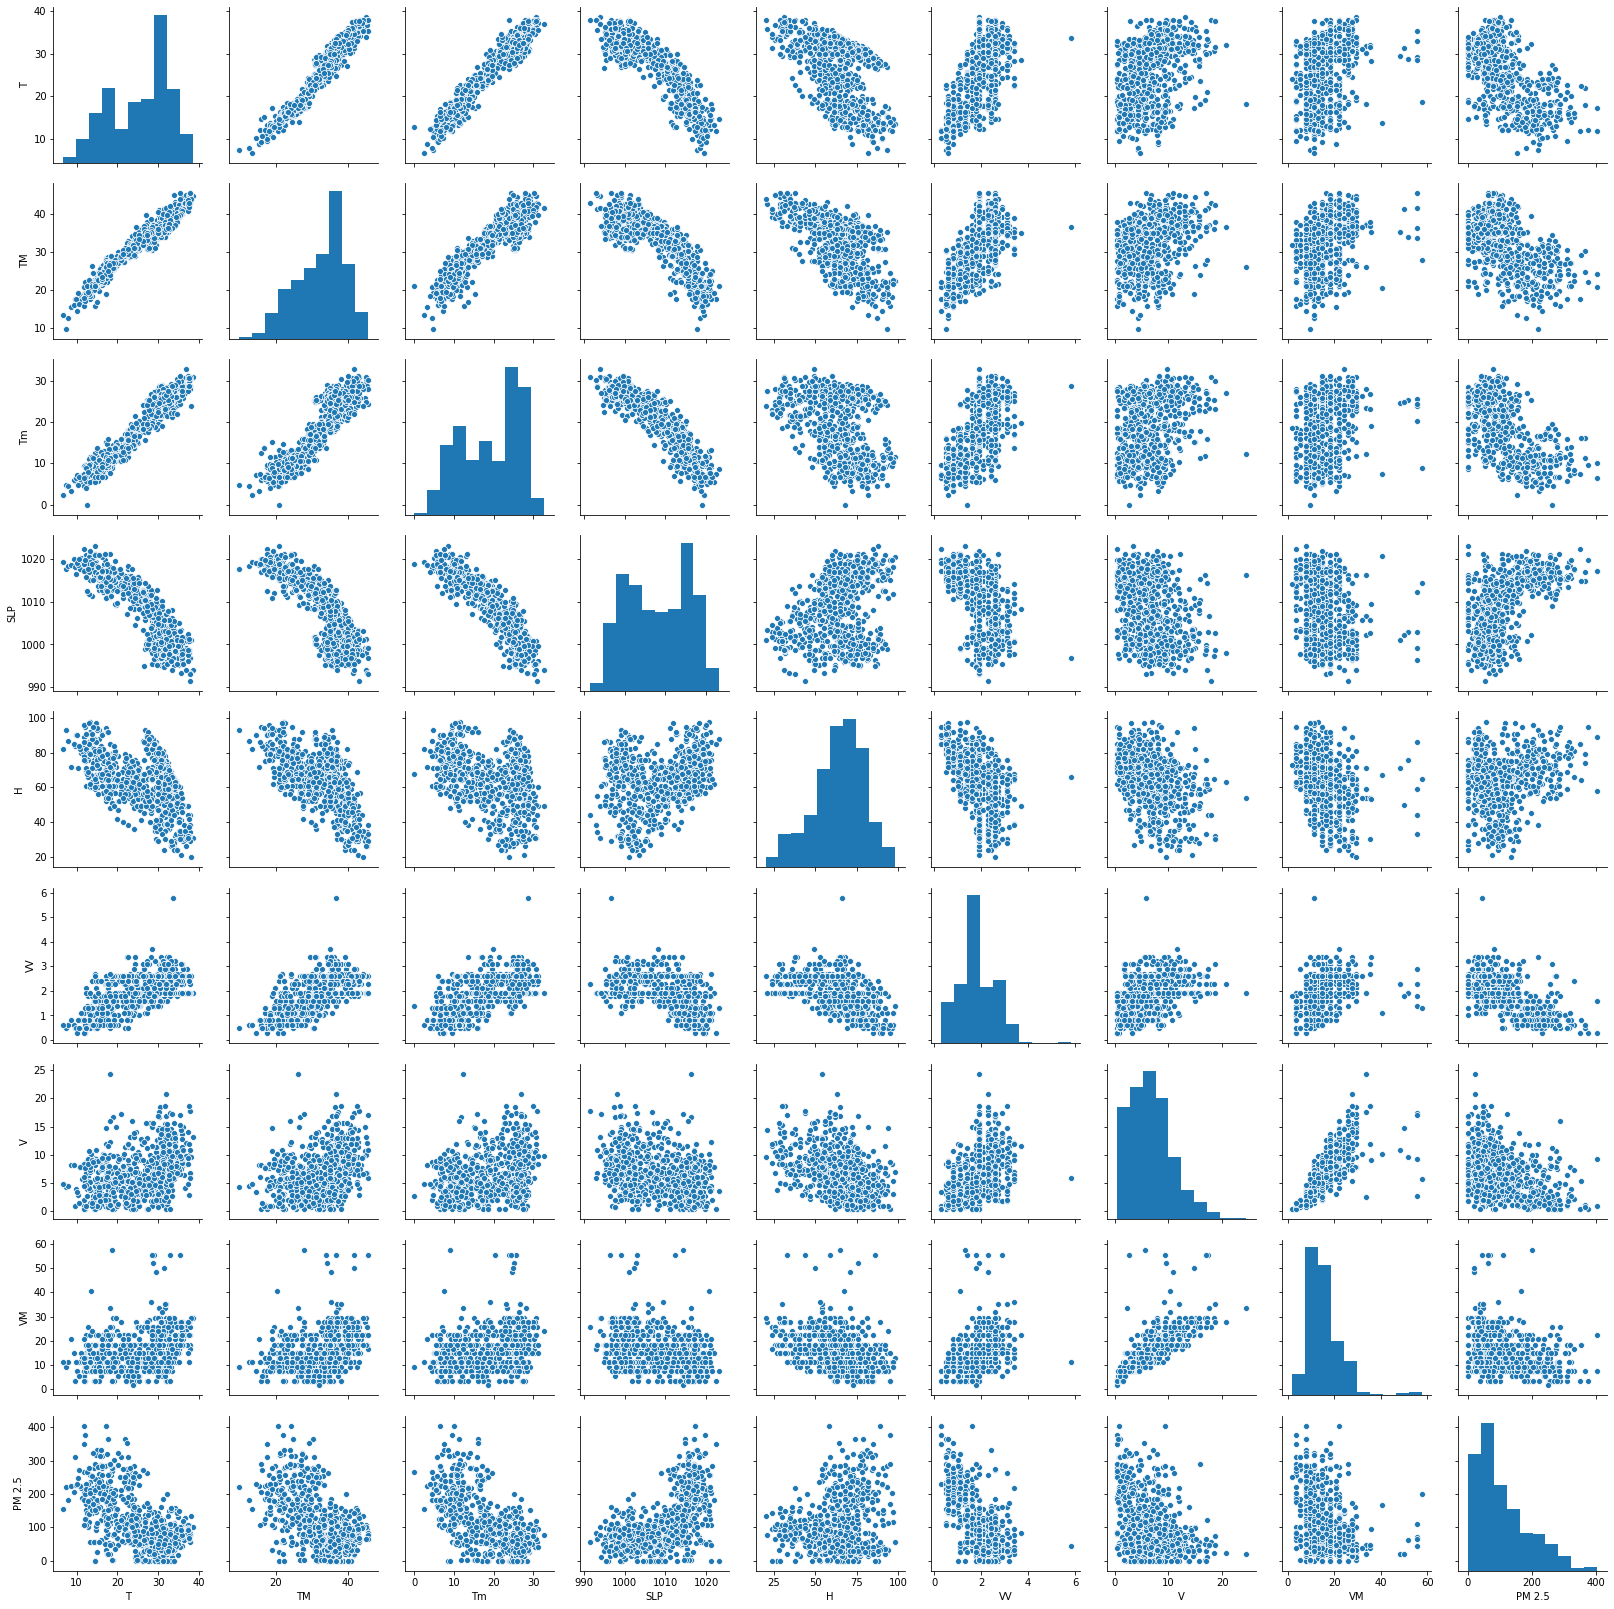

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


# Feature Importance

Using the Extra Tree Classifier method

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,Y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [10]:
print(model.feature_importances_)

[0.15741644 0.05036405 0.25198908 0.11095047 0.08627255 0.26244312
 0.04294223 0.03762206]


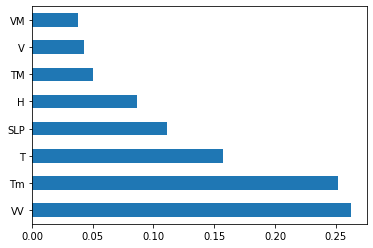

In [11]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We have very features so we will use all the features

# Decision Trees

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Model

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
from sklearn.model_selection import cross_val_score

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [14]:
drugTree = DecisionTreeRegressor(criterion="mse")
drugTree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [15]:
predTree = drugTree.predict(X_test)

## Model Evaluation

### Using CV

In [16]:
score = cross_val_score(drugTree, X, Y, cv=5)
score.mean()

0.19693616692230603

### Using R2 Score

In [48]:
from sklearn.metrics import r2_score
r2_score(Y_test, predTree)

0.33134290237762554

The model is overfitting

### Using Tree Visualization

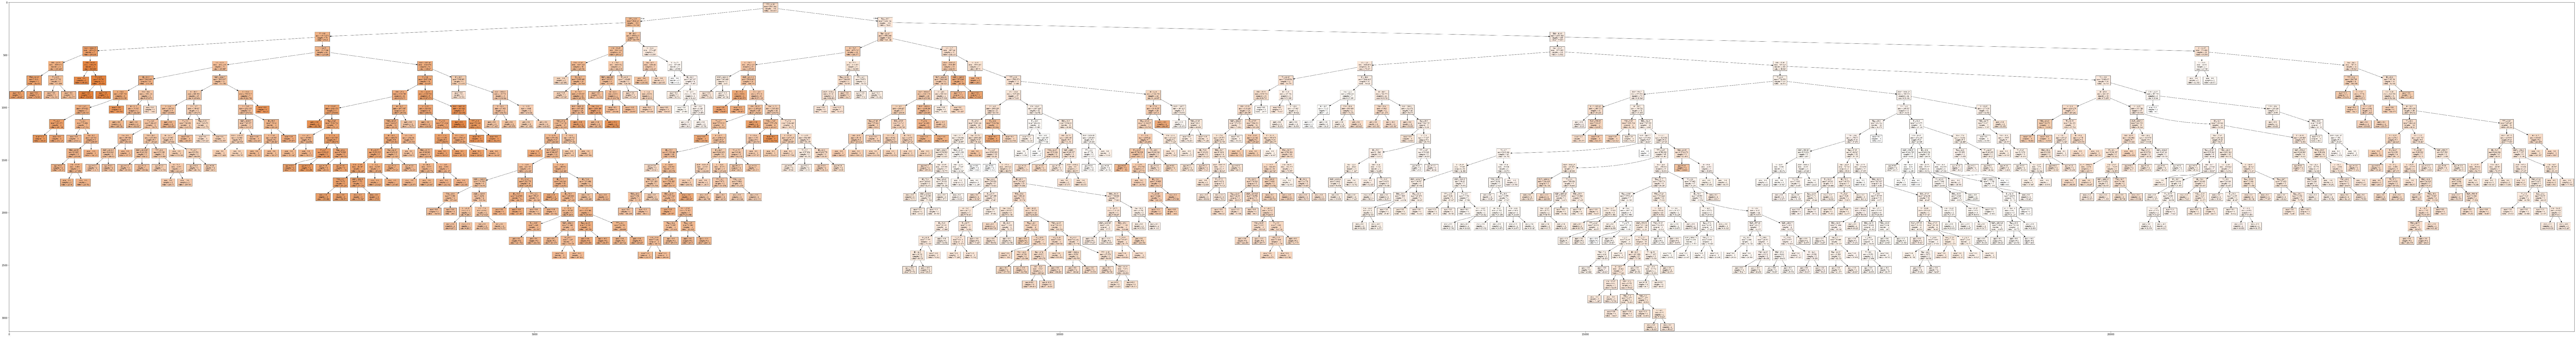

In [62]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:8]
targetNames = df["PM 2.5"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 300))
plt.imshow(img,interpolation='nearest')


### Using Distplot

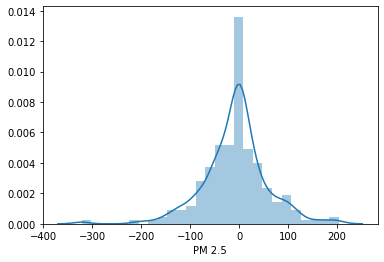

In [21]:
sns.distplot(Y_test - predTree)

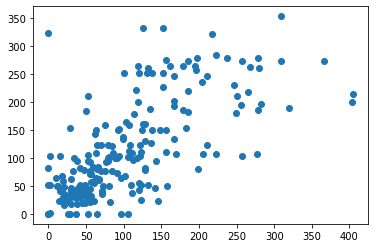

In [22]:
plt.scatter(Y_test, predTree)

## Error Metrics using RMSE

In [19]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(Y_test, predTree))
print('MSE:', metrics.mean_squared_error(Y_test, predTree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predTree)))

MAE: 45.74613774733638
MSE: 4365.09639863965
RMSE: 66.06887617206493


# HyperParamater Tunning 

In [ ]:
DecisionTreeRegressor()

In [26]:
params = {
    
    'splitter' : ['best','random'],
    'max_depth' : [3,4,5,6,8,12],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4],
    'max_features' : ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70]
    
    }

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
randomsearch = GridSearchCV(drugTree, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=10,verbose=3 )

In [38]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time taken: %i hours, %i minutes, and %s seconds." %(thour, tmin, round(tsec, 2)))
        

In [40]:
from datetime import datetime

start_time = timer(None)
randomsearch.fit(X,Y)
timer(start_time)


Fitting 10 folds for each of 7680 candidates, totalling 76800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 429 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 2349 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 5037 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 8493 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 12717 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 17709 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 23469 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 29997 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 37293 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 45357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 54189 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 63789 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 74157 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 76800 o


 Time taken: 0 hours, 2 minutes, and 13.83 seconds.


In [41]:
randomsearch.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [42]:
randomsearch.best_score_

-3134.975405565452

In [44]:
predictions = randomsearch.predict(X_test)

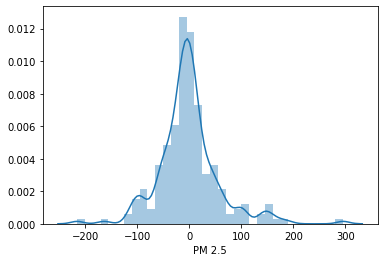

In [45]:
sns.distplot(Y_test - predictions)

In [46]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 39.53848467882893
MSE: 3451.6242365351795
RMSE: 58.75052541497122


## For Deployment

In [34]:
import pickle

In [49]:
#Open the file
file = open('DecisionTree_Model.pkl', 'wb')

#Dump information to the file
pickle.dump(randomsearch, file)


<IPython.core.display.Javascript object>